# Analysis of cleaned Bubble Sort data, PC 16 only
## This notebook is used to answer SQ 2, SQ 3 and the RQ of our project. 

#### Imports and loading CSVs in Dataframes

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

dfBubble16 = pd.read_csv("BranchMisPredictionClean-PC16.csv")


dfRead16 = pd.read_csv("BranchMisPredictionREADCSVClean-PC16.csv")



dfBubble16

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,89.533447,78.013611,1.915344,12968.1,56,greaterThan0,10000
1,89.148987,77.656555,1.911316,12964.0,56,greaterThan0,10000
2,87.678711,77.169312,1.745117,11817.6,57,greaterThan0,10000
3,84.473633,74.263977,1.692444,11443.9,57,greaterThan0,10000
4,84.666931,74.415405,1.696960,11461.0,57,greaterThan0,10000
...,...,...,...,...,...,...,...
238,5036.593506,4293.463379,122.472839,850552.0,55,greaterThanEquals0,50000
239,4838.362061,4176.656982,108.162354,751035.0,53,greaterThanEquals0,50000
240,5033.898865,4282.644653,122.709106,852244.0,52,greaterThanEquals0,50000
241,5032.376038,4281.642883,122.986145,852356.0,52,greaterThanEquals0,50000


In [16]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,1.483276,1.278564,0.081726,148.736,69.0,branchMispredict0,10000
1,1.434998,1.235535,0.081299,138.324,69.0,branchMispredict0,10000
2,1.543823,1.301941,0.091492,174.954,69.0,branchMispredict0,10000
3,1.509460,1.287048,0.089050,166.672,69.0,branchMispredict0,10000
4,1.516907,1.312866,0.082764,152.392,69.0,branchMispredict0,10000


In [17]:
def calcMean(df,type,size):
    rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
    rowMean["Input case"] = type
    return rowMean
    

def meansOfTests(df):
    s = [10000,20000,30000,40000,50000]
    c = ["greaterThan0", "greaterThanEquals0"]
    l = []
    for case in c:
        for size in s:
            l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfBubbleMean16 = meansOfTests(dfBubble16)

dfBubbleMean16


C:\Users\langk\AppData\Local\Temp\ipykernel_900\4114371558.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_900\4114371558.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_900\4114371558.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_900\4114371558.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid 

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,87.914391,77.027579,1.804746,12214.488462,58.576923,10000.0,greaterThan0
1,353.537192,311.161312,6.952785,47541.2,59.392857,20000.0,greaterThan0
2,793.888703,697.922601,15.644068,107823.172414,60.034483,30000.0,greaterThan0
3,1405.942527,1237.937762,27.252413,188471.892857,60.857143,40000.0,greaterThan0
4,2183.140371,1928.500322,41.217134,285554.84,62.48,50000.0,greaterThan0
5,204.769338,174.546668,4.978141,34261.726087,54.956522,10000.0,greaterThanEquals0
6,832.178469,711.798271,19.766164,136624.782609,54.869565,20000.0,greaterThanEquals0
7,1818.944889,1548.816399,44.341804,307272.882353,53.352941,30000.0,greaterThanEquals0
8,3189.660872,2729.783662,75.317437,522563.84,54.12,40000.0,greaterThanEquals0
9,4980.238686,4263.346159,117.388765,815120.315789,54.368421,50000.0,greaterThanEquals0


In [18]:

def listOfCases(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def meansOfTestsReadCSV(df):
    s = [10000,20000,30000,40000,50000]
    c = listOfCases(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = meansOfTestsReadCSV(dfRead16)
dfReadMean16

C:\Users\langk\AppData\Local\Temp\ipykernel_900\4114371558.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_900\4114371558.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_900\4114371558.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowMean = df[df["Input case"]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,1.488693,1.273338,0.087178,161.691147,66.113772,10000.0,branchMispredict0
1,1.736864,1.488728,0.10445,189.137062,65.526882,20000.0,branchMispredict0
2,2.026809,1.752004,0.117567,207.062142,66.316456,30000.0,branchMispredict0
3,2.176854,1.879923,0.129964,224.041751,67.0,40000.0,branchMispredict0
4,2.303514,1.991165,0.136472,234.531959,67.193989,50000.0,branchMispredict0


In [19]:
dfBubbleMean16 = dfBubbleMean16.reset_index(drop=True)



dfReadMean16 = dfReadMean16.reset_index(drop=True)


dfBubbleMean16[dfBubbleMean16["Size"]>150000]
#remove nans here?

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case


In [20]:
def deductReadFromAlg(dfMeanAlg, dfReadMean):
    lCPU = []
    lTime = []
    lDRAM = []

    for i in range(len(dfMeanAlg["Size"])):
        case = dfMeanAlg["Input case"][i]
        size = dfMeanAlg["Size"][i]
        #define best, worst and random inputs for each alg here!
        if case == "greaterThan0":
                case2 = "branchMispredict0"
        if case == "greaterThanEquals0":
            case2 = "branchMispredict0"


        rawCPU = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"].index.tolist()[0]]
        readCPU = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lCPU.append((rawCPU-readCPU)/400)

        rawTime = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"].index.tolist()[0]]
        readTime = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["Time (ms)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lTime.append((rawTime - readTime)/400)

        rawDRAM = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["DRAM (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        readDRAM = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["DRAM (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lDRAM.append((rawDRAM-readDRAM)/400)

    dfMeanAlg["CPU - readCSV"] = lCPU
    dfMeanAlg["Time - readCSV"] = lTime
    dfMeanAlg["Memory - readCSV"] = lDRAM


deductReadFromAlg(dfBubbleMean16,dfReadMean16)


dfBubbleMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_900\3079684945.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rawCPU = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_900\3079684945.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rawTime = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_900\3079684945.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rawDRAM = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["DRAM (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["DRAM (J)"].index.tolist()[0]]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV
0,87.914391,77.027579,1.804746,12214.488462,58.576923,10000.0,greaterThan0,0.189386,30.131993,0.004294
1,353.537192,311.161312,6.952785,47541.2,59.392857,20000.0,greaterThan0,0.774181,118.380157,0.017121
2,793.888703,697.922601,15.644068,107823.172414,60.034483,30000.0,greaterThan0,1.740426,269.040276,0.038816
3,1405.942527,1237.937762,27.252413,188471.892857,60.857143,40000.0,greaterThan0,3.090145,470.619628,0.067806
4,2183.140371,1928.500322,41.217134,285554.84,62.48,50000.0,greaterThan0,4.816273,713.300770,0.102702


In [21]:
dfBubbleMean16[dfBubbleMean16["Size"]==500000]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV


# PLOTS

## SQ 2: Time vs input size regressions

In [22]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if r2 > 0.5 and regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [23]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [25]:
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    size2 = []
    for case in ["greaterThan0", "greaterThanEquals0"]:
        if case != "random":
            for size in [10000,20000,30000,40000,50000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                size2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [10000,20000,30000,40000,50000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    size2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["Size^2"] = size2

calcPercent(dfBubbleMean16)

dfBubbleMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_900\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,Size^2
0,87.914391,77.027579,1.804746,12214.488462,58.576923,10000.0,greaterThan0,0.189386,30.131993,0.004294,87.616575,100,0.193680,1.000000e+08
1,353.537192,311.161312,6.952785,47541.2,59.392857,20000.0,greaterThan0,0.774181,118.380157,0.017121,88.013742,100,0.791302,4.000000e+08
2,793.888703,697.922601,15.644068,107823.172414,60.034483,30000.0,greaterThan0,1.740426,269.040276,0.038816,87.911895,100,1.779243,9.000000e+08
3,1405.942527,1237.937762,27.252413,188471.892857,60.857143,40000.0,greaterThan0,3.090145,470.619628,0.067806,88.050382,100,3.157951,1.600000e+09
4,2183.140371,1928.500322,41.217134,285554.84,62.48,50000.0,greaterThan0,4.816273,713.300770,0.102702,88.336066,100,4.918975,2.500000e+09


In [26]:
dfBubbleMean16.to_csv("bubbleFinalData-PC16.csv", sep=",", index=False)

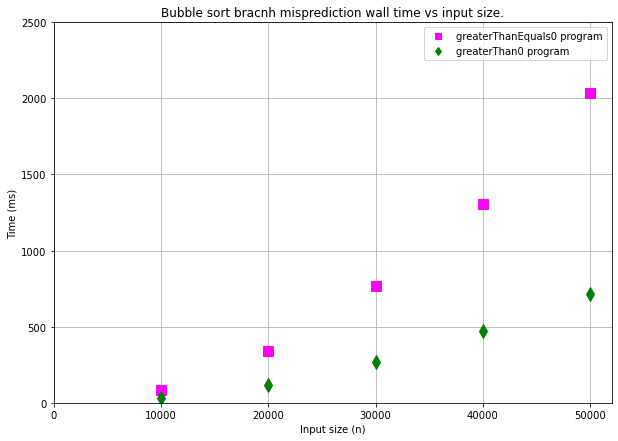

In [36]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(-100000,-100000,"s", color="fuchsia",label="greaterThanEquals0 program")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-100000,-100000,"d", color="green",label="greaterThan0 program")
#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort bracnh misprediction wall time vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.ylim(0,2500)
plt.xlim(0,52000)
plt.grid()
plt.legend()
plt.show()


## SQ 2: Time vs BigO

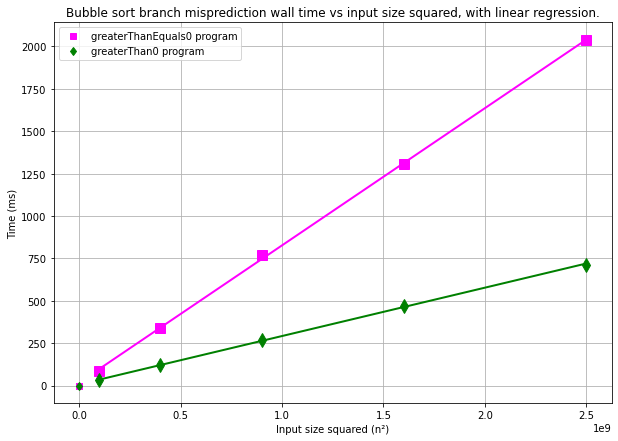

In [38]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="greaterThanEquals0 program")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="greaterThan0 program")
#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort branch misprediction wall time vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


## Zoom: Time vs n^2

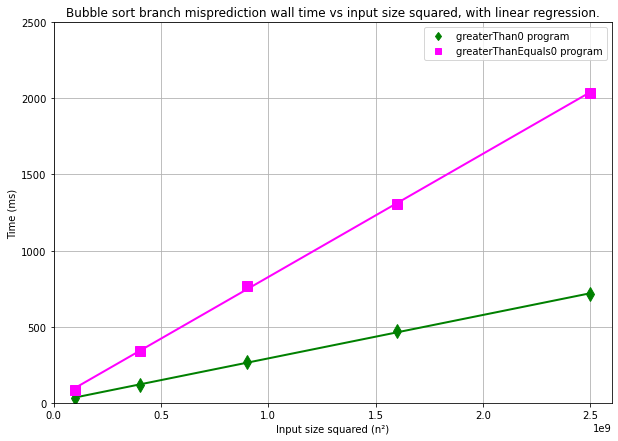

In [50]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-100000,-100000,"d", color="green",label="greaterThan0 program")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-100000,-100000,"s", color="fuchsia",label="greaterThanEquals0 program")

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort branch misprediction wall time vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Time (ms)")
plt.grid()
plt.xlim(0,2600000000)
plt.ylim(0,2500)
plt.legend()
plt.show()


## SQ 3: Energy vs. Time


worst R2  0.9997864041479068 

best R2  0.9995826953046386 



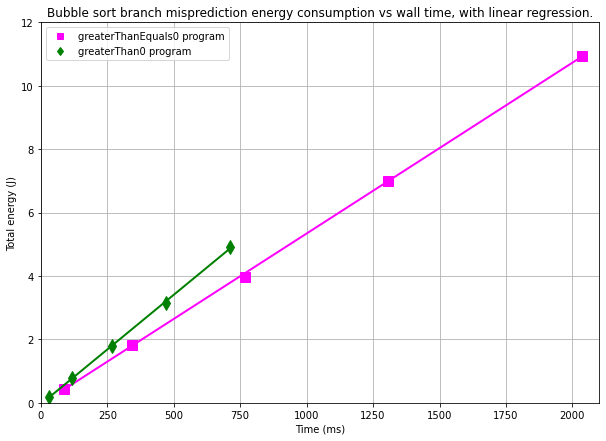

In [63]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-10000,0,"s", color="fuchsia",label="greaterThanEquals0 program")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-10000,0,"d", color="green",label="greaterThan0 program")
print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort branch misprediction energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(0, 2100)
plt.ylim(0,12)
plt.legend()
plt.grid()
plt.show()


## RQ: EC vs BigO

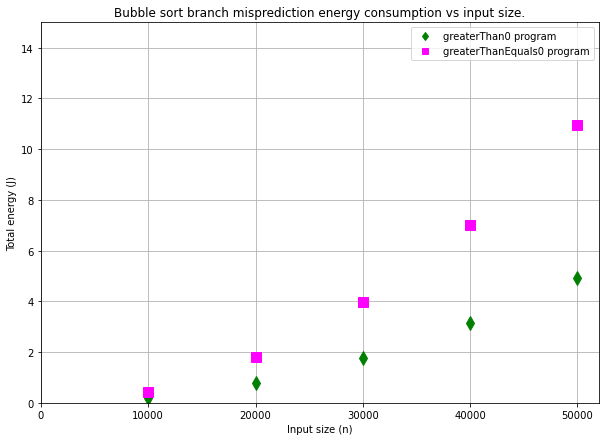

In [74]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-100000,-100000,"d", color="green",label="greaterThan0 program")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(-100000,-100000,"s", color="fuchsia",label="greaterThanEquals0 program")

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort branch misprediction energy consumption vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.xlim(0,52000)
plt.ylim(0,15)
plt.grid()
plt.legend()
plt.show()

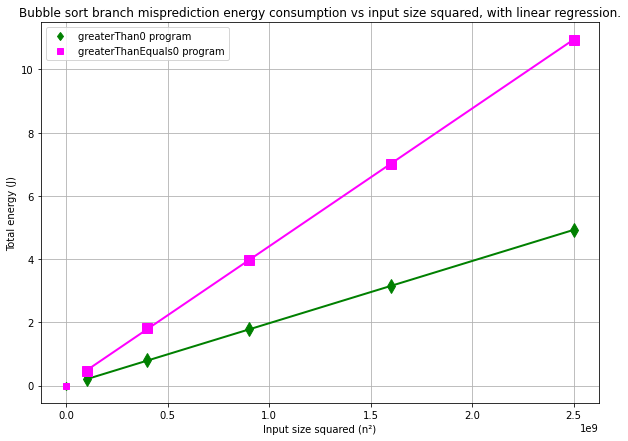

In [75]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="greaterThan0 program")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="greaterThanEquals0 program")

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort branch misprediction energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.show()

## Zoom: Energy vs. BigO

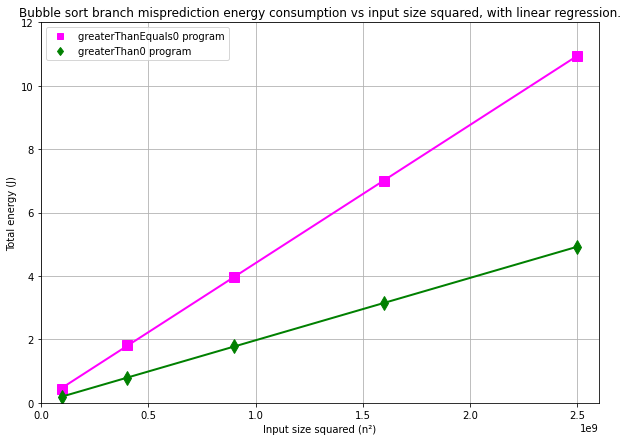

In [85]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-1111000000011110,0,"s", color="fuchsia",label="greaterThanEquals0 program")

plt.plot(-110000000110,0,"d", color="green",label="greaterThan0 program")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["full EC"],1, "Merge time for best case input", "green",dots="d")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort branch misprediction energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend(loc="upper left")
plt.xlim(0,2600000000)
plt.ylim(0,12)
plt.show()

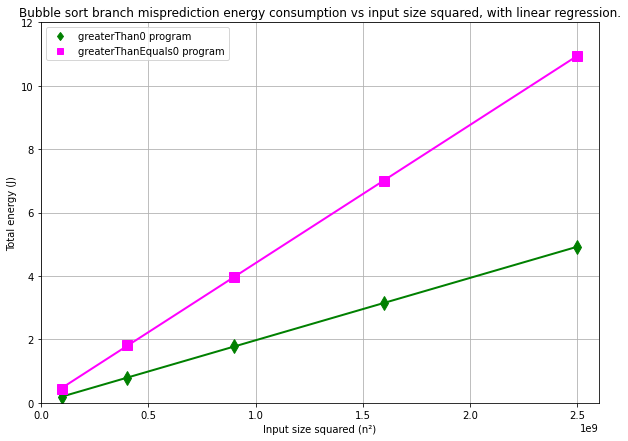

In [93]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThan0"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-110000000110,0,"d", color="green",label="greaterThan0 program")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "greaterThanEquals0"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-1111000000011110,0,"s", color="fuchsia",label="greaterThanEquals0 program")

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort branch misprediction energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend(loc="upper left")
plt.xlim(0,2600000000)
plt.ylim(0,12)
plt.show()